In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:\\Users\\ajroy\\OneDrive\\Desktop\\New folder\\zomato_EDA\\data\\zomato_cleaned.csv")
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,Cost2plates,Type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,others,800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,others,800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,others,600.0,Buffet


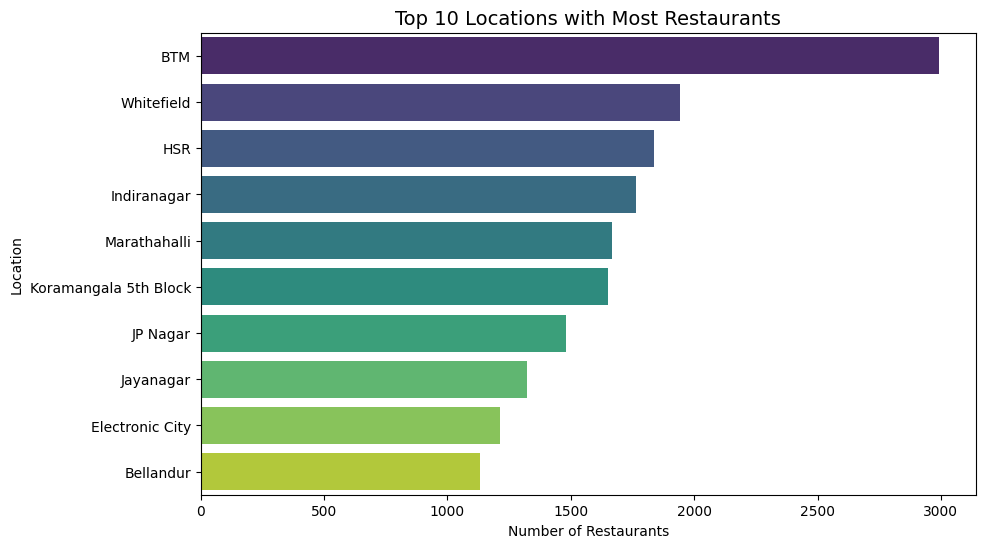

In [4]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.index, palette='viridis', legend=False)
plt.title("Top 10 Locations with Most Restaurants", fontsize=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

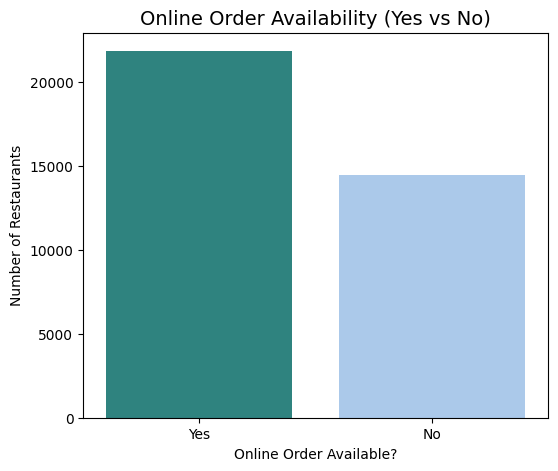

In [5]:
online_order= df[df['online_order'] == 'Yes']
yes_df = df[df['online_order'] == 'Yes']      # sirf Yes [web:41]
no_df  = df[df['online_order'] == 'No']       # sirf No  [web:41]


# 1) Countplot
plt.figure(figsize=(6,5))
sns.countplot(data=yes_df, x='online_order', hue='online_order', palette='viridis', legend=False)
sns.countplot(data=no_df, x='online_order', hue='online_order', palette='pastel', legend=False)
plt.title("Online Order Availability (Yes vs No)", fontsize=14)
plt.xlabel("Online Order Available?")
plt.ylabel("Number of Restaurants")
plt.show()

C:\Users\ajroy\AppData\Local\Temp\ipykernel_22652\2525291688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_df, x='book_table',  palette='viridis', )
C:\Users\ajroy\AppData\Local\Temp\ipykernel_22652\2525291688.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_df, x='book_table',  palette='pastel', )


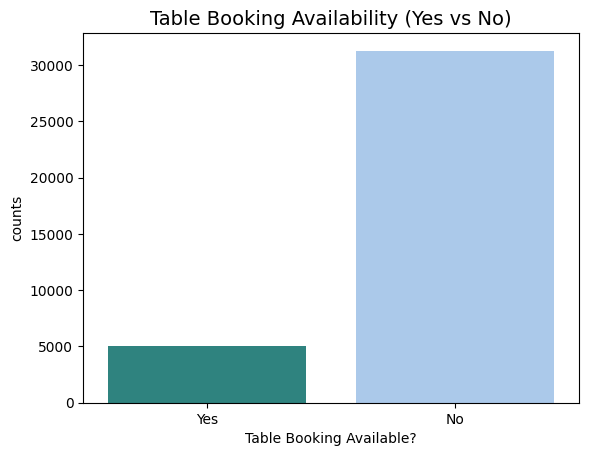

In [6]:
book_table= df[df['book_table'] == 'Yes']
yes_df = df[df['book_table'] == 'Yes']      # sirf Yes [web:41]
no_df  = df[df['book_table'] == 'No']       # sirf No  [web:41]

sns.countplot(data=yes_df, x='book_table',  palette='viridis', )
sns.countplot(data=no_df, x='book_table',  palette='pastel', )
plt.title("Table Booking Availability (Yes vs No)", fontsize=14)
plt.xlabel("Table Booking Available?")
plt.ylabel("counts")
plt.show()

C:\Users\ajroy\AppData\Local\Temp\ipykernel_22652\3669539194.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')


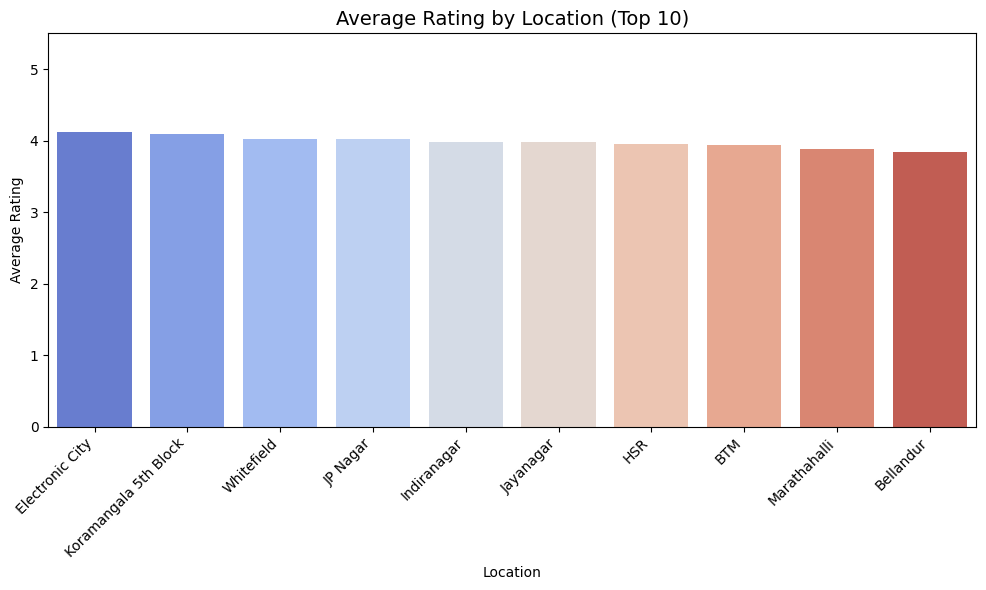

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Clean 'rate' column
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# 2️⃣ Drop null values in rate and location
df = df.dropna(subset=['rate', 'location'])

# 3️⃣ Take top 10 locations by number of restaurants
top_locations = df['location'].value_counts().nlargest(10).index
df_top = df[df['location'].isin(top_locations)]

# 4️⃣ Calculate average rating per location
avg_rating = df_top.groupby('location')['rate'].mean().sort_values(ascending=False)

# 5️⃣ Plot the average ratings
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')
plt.title("Average Rating by Location (Top 10)", fontsize=14)
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.ylim(0, 5.5)  # Ratings usually between 0–5
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
